Step 1: Import Libraries and Load Data

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('digital_habits_vs_mental_health.csv')

df.head()

,screen_time_hours,social_media_platforms_used,hours_on_TikTok,sleep_hours,stress_level,mood_score
0,10.3,2,5.3,4.4,10,5
1,6.5,5,3.5,6.2,8,8
2,9.1,4,2.8,6.6,7,8
3,6.5,3,2.5,6.5,7,9
4,2.1,3,1.2,7.8,2,10


Step 2: Basic Data Exploration

In [15]:
# Step 2: Data Exploration
print(df.info())          # Data types and non-null counts
print(df.describe())      # Statistical overview

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   screen_time_hours            100000 non-null  float64
 1   social_media_platforms_used  100000 non-null  int64  
 2   hours_on_TikTok              100000 non-null  float64
 3   sleep_hours                  100000 non-null  float64
 4   stress_level                 100000 non-null  int64  
 5   mood_score                   100000 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 4.6 MB
None
       screen_time_hours  social_media_platforms_used  hours_on_TikTok  \
count      100000.000000                100000.000000    100000.000000   
mean            6.003505                     2.997820         2.401433   
std             1.987073                     1.414452         1.079111   
min             1.000000                     1.000000         0.2000

In [17]:
# Step 3: Data Cleaning
# For simplicity, let's drop rows with NAs (if any)
df = df.dropna()

# Confirm cleaning
df.isnull().sum()

screen_time_hours              0
social_media_platforms_used    0
hours_on_TikTok                0
sleep_hours                    0
stress_level                   0
mood_score                     0
dtype: int64

In [18]:
# Step 4: Feature Engineering

# Ensure stress_level and mood_score exist, adjust col names as needed
df['Disturbed_Pct'] = ((df['stress_level'] + (10 - df['mood_score'])) / 20) * 100

# See the new column
df[['screen_time_hours', 'stress_level', 'mood_score', 'Disturbed_Pct']].head()

,screen_time_hours,stress_level,mood_score,Disturbed_Pct
0,10.3,10,5,75.0
1,6.5,8,8,50.0
2,9.1,7,8,45.0
3,6.5,7,9,40.0
4,2.1,2,10,10.0


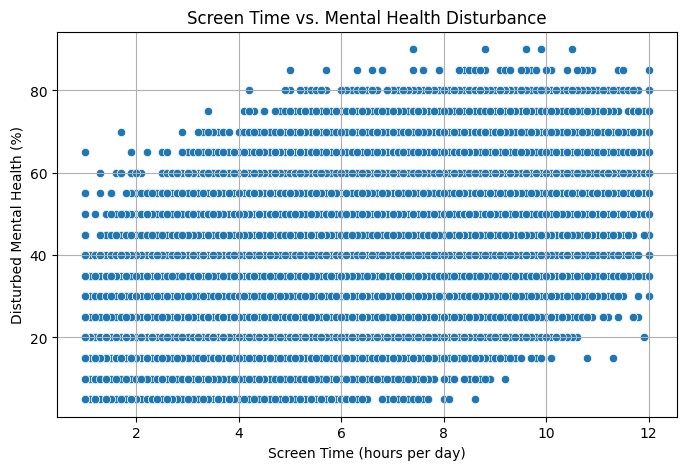

Correlation Matrix:
                    screen_time_hours  Disturbed_Pct
screen_time_hours           1.000000       0.479036
Disturbed_Pct               0.479036       1.000000


In [19]:
# Step 5: EDA

# Scatter plot to observe the trend
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='screen_time_hours', y='Disturbed_Pct')
plt.title('Screen Time vs. Mental Health Disturbance')
plt.xlabel('Screen Time (hours per day)')
plt.ylabel('Disturbed Mental Health (%)')
plt.grid(True)
plt.show()

# Calculate correlation
correlation = df[['screen_time_hours', 'Disturbed_Pct']].corr()
print('Correlation Matrix:\n', correlation)

In [20]:
# Step 6: Train-Test Split

from sklearn.model_selection import train_test_split

X = df[['screen_time_hours']]           # Features as a DataFrame
y = df['Disturbed_Pct']                 # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}')

Training samples: 80000, Test samples: 20000


In [21]:
# Step 7: Linear Regression Model

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print('Model Coefficient (slope): ', model.coef_[0])
print('Model Intercept: ', model.intercept_)

Model Coefficient (slope):  3.643421231095861
Model Intercept:  13.734478581492436


MSE: 174.43
MAE: 10.69
R^2 Score: 0.23


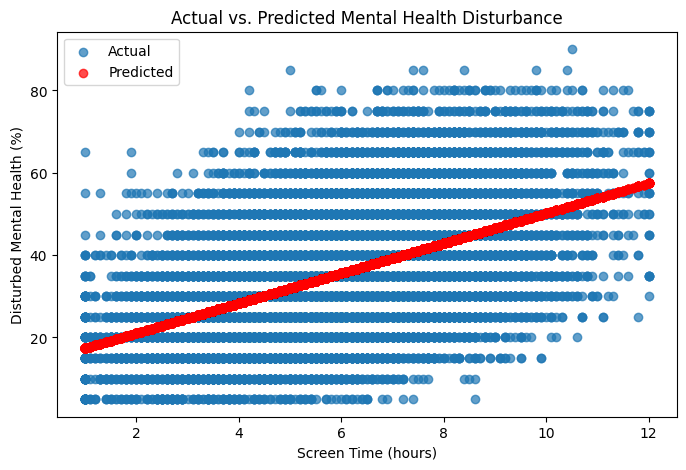

In [22]:
# Step 8: Model Evaluation

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R^2 Score: {r2:.2f}')

# Plot actual vs predicted
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, label="Actual", alpha=0.7)
plt.scatter(X_test, y_pred, label="Predicted", alpha=0.7, color='red')
plt.xlabel("Screen Time (hours)")
plt.ylabel("Disturbed Mental Health (%)")
plt.title("Actual vs. Predicted Mental Health Disturbance")
plt.legend()
plt.show()

In [31]:
# Step 9: User Prediction Function
def predict_disturbance(screen_time_hr):
    # Use a DataFrame with same feature name as during training
    input_df = pd.DataFrame({'screen_time_hours': [screen_time_hr]})
    pred = model.predict(input_df)[0]
    return max(0, min(100, pred))

# Example usage:
example_time = 6  # hours per day
pred_disturbance = predict_disturbance(example_time)
print(f"For {example_time} hours of daily screen time, predicted disturbance is {pred_disturbance:.1f}%")

For 6 hours of daily screen time, predicted disturbance is 35.6%


In [32]:
# Step 10: Save the model (optional)
import joblib

joblib.dump(model, 'screen_time_mental_health_model.pkl')

['screen_time_mental_health_model.pkl']

In [33]:
# To load it back:
model = joblib.load('screen_time_mental_health_model.pkl')